In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Above code is importing necessary modules for the exercise.

In [2]:
gdp_df = pd.read_csv("..\data\gdp_percapita.csv")
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
...,...,...,...,...
7171,Zimbabwe,1994,2603.927369,NaN
7172,Zimbabwe,1993,2420.092791,NaN
7173,Zimbabwe,1992,2437.152908,NaN
7174,Zimbabwe,1991,2733.696626,NaN


Above code is importing the appropriate .csv where '..' symbolizes the need to move up in the file structure to search for the needed file. 

Code below is finding the layout of the DataFrame where the first number represents number of rows and the second represents number of columns. 

In [3]:
gdp_df.shape

(7176, 4)

#### How many rows and columns are in `gdp_df`? What are the data types of each column?

7176 rows and 4 columns.

In [4]:
gdp_df = gdp_df.drop(columns = ["Value Footnotes"])

Above code is dropping the "Value Footnotes" column.

In [5]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_capita']

In [6]:
gdp_df

,Country,Year,GDP_Per_capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


Above code is renaming the columns and displaying the new DataFrame

In [7]:
years = set(list(gdp_df.Year))
print(years)
len(years)

{1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020}


31

Above code creates a set of all unique years in the DataFrame and the count of values in the set.

In [8]:
year_counts = gdp_df.Country.value_counts()

Above code starts the structuring of a new DataFrame indicating year counts.

In [9]:
year_counts = year_counts.to_frame()

In [10]:
year_counts = year_counts.reset_index()

In [11]:
year_counts.columns = ['country', 'year_count']

Above code finishes organizing and re-labeling new DataFrame 'year_counts'

In [12]:
missing_year_mask = year_counts['year_count'] != len(years)

Above code creates the mask to filter countries that aren't present in every year.

In [13]:
missing_years = year_counts[missing_year_mask]
print('Countries missing data for all years', missing_years.country.count())

Countries missing data for all years 37


Above code masks the year_counts DataFrame to countries with a year_count not equal to 31 and returns the count of countries in the list.

In [14]:
print("Countries with complete data:", year_counts.country.count() - missing_years.country.count())

Countries with complete data: 205


Above code block subtracts the years missing data from the total count of countries in the data set.

In [15]:
print("Years present in the data:", len(years))

Years present in the data: 31


Above code block counts the number of years present in a previously created set of all years.

In [16]:
missing_years

,country,year_count
205,Turkmenistan,30
206,Hungary,30
207,Slovak Republic,29
208,Cambodia,28
209,West Bank and Gaza,27
210,Bosnia and Herzegovina,27
211,Slovenia,26
212,Latvia,26
213,Israel,26
214,Lithuania,26


#### 7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

37 countries are missing data, 205 countries have data for all 31 years in the data. 

The majority of countries have entries for all years. It seems that the countries missing data were not a part of the UN during a portion of the dataset. 

In [17]:
mask_2020 = gdp_df['Year'] == 2020

Creating a mask for information in the year 2020.

In [18]:
gdp2020_df = gdp_df[mask_2020]
gdp2020_df

,Country,Year,GDP_Per_capita
0,Afghanistan,2020,1970.560169
19,Africa Eastern and Southern,2020,3491.978104
50,Africa Western and Central,2020,4021.293919
81,Albania,2020,13253.733337
112,Algeria,2020,10735.382539
...,...,...,...
7025,Vietnam,2020,10338.270543
7056,West Bank and Gaza,2020,5402.538773
7083,World,2020,16269.969854
7114,Zambia,2020,3277.816510


In [19]:
type(gdp2020_df)

pandas.core.frame.DataFrame

Masking the gdp_df DataFrame to display just the year 2020, checking data type.

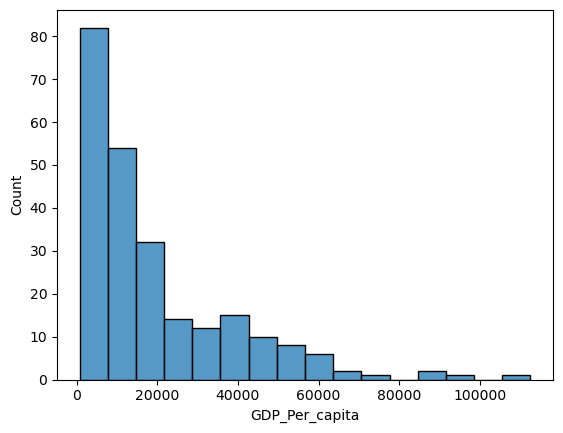

In [20]:
sns.histplot(data=gdp2020_df, x="GDP_Per_capita")
plt.show()

Plotting a histogram for 2020 GDP_Per_capita.

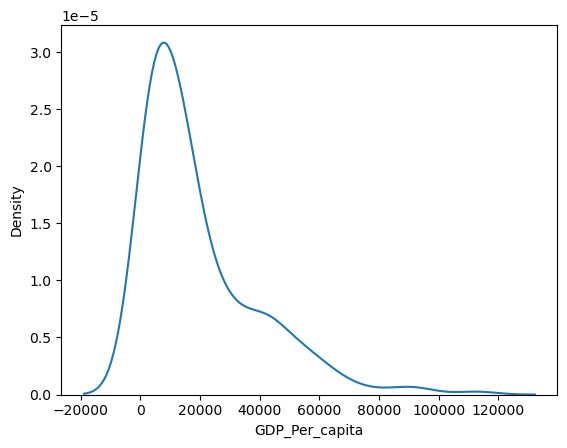

In [21]:
sns.kdeplot(gdp2020_df['GDP_Per_capita'])
plt.show()

Plotting a density plot for 2020 GDP_Per_capita.

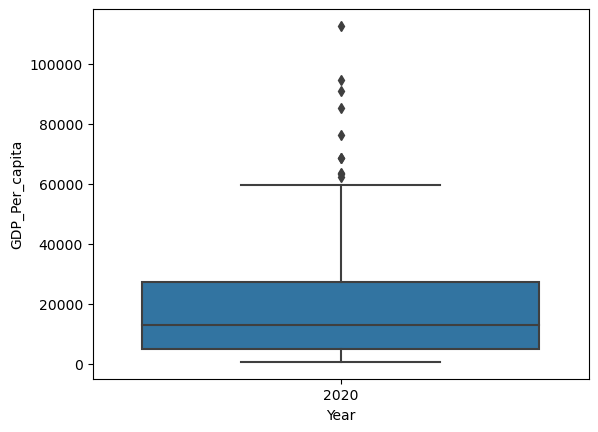

In [22]:
sns.boxplot( x=gdp2020_df["Year"], y=gdp2020_df["GDP_Per_capita"] )
plt.show()

Creating boxplot for 2020 GDP_Per_capita

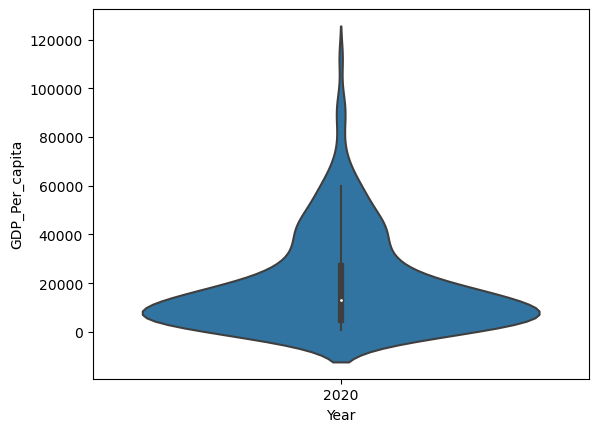

In [23]:
sns.violinplot( x=gdp2020_df["Year"], y=gdp2020_df["GDP_Per_capita"] )
plt.show()

Creating a violin plot for 2020 GDP_Per_capita

#### 8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

Boxplot and histogram do not show negative values by default.Density plot shows lists the density of the variable instead of the count or visual representation of the count. 

In [24]:
print("The median GDP_Per_capita for 2020 is", gdp2020_df.GDP_Per_capita.median())

The median GDP_Per_capita for 2020 is 12908.9374056206


#### 9. What was the median GDP per capita value in 2020?

The median gdp value in 2020 is 12908.9374056206.

In [25]:
gdp_decades = gdp_df[(gdp_df.Year == 2020) | (gdp_df.Year == 2010) | (gdp_df.Year == 2000) | (gdp_df.Year == 1990)]


Above code subsets the gdp_df DataFrame to a new frame called gdp_decades using the | operator to signify the 'or' condition. 

When filtering for multiple conditions:

| = or, & = and, ~ = not 

In [26]:
gdp_decades

,Country,Year,GDP_Per_capita
0,Afghanistan,2020,1970.560169
10,Afghanistan,2010,1957.029070
19,Africa Eastern and Southern,2020,3491.978104
29,Africa Eastern and Southern,2010,3545.205203
39,Africa Eastern and Southern,2000,2915.472987
...,...,...,...
7144,Zambia,1990,2190.181724
7145,Zimbabwe,2020,2134.555461
7155,Zimbabwe,2010,1813.531764
7165,Zimbabwe,2000,2771.060576


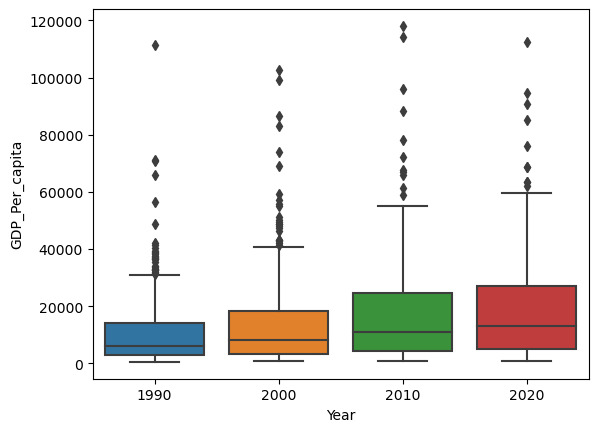

In [27]:
sns.boxplot( x=gdp_decades["Year"], y=gdp_decades["GDP_Per_capita"] )
plt.show()

Boxplot of the gdp_decades DataFrame.

<AxesSubplot:xlabel='Year', ylabel='GDP_Per_capita'>

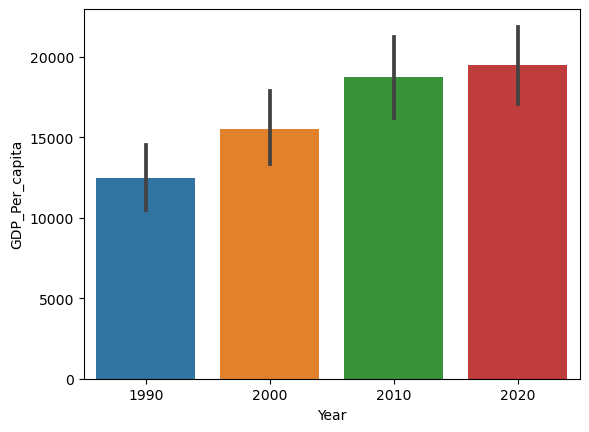

In [28]:
sns.barplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_capita"])

Barplot of the gdp_decades DataFrame.

<AxesSubplot:xlabel='Year', ylabel='GDP_Per_capita'>

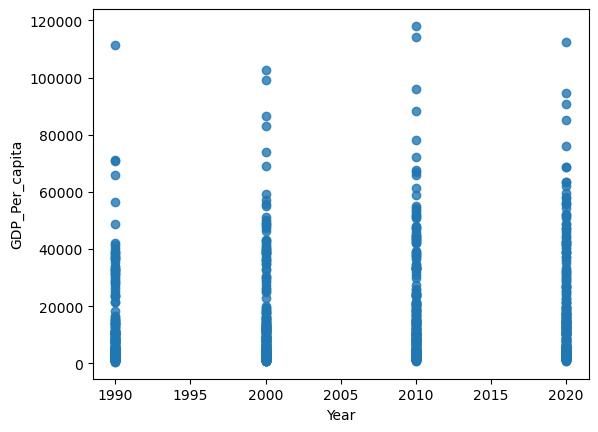

In [29]:
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_capita"], fit_reg=False)

Scatterplot without a trendline. Linear regression fit is plotted by default.

<AxesSubplot:xlabel='Year', ylabel='GDP_Per_capita'>

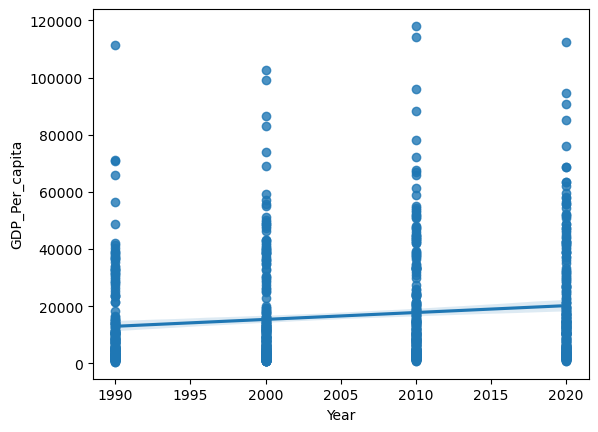

In [30]:
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_capita"])

Scatterplot with a linear regression fit plotted by default.

In [31]:
gdp100k = gdp_df[(gdp_df.GDP_Per_capita >= 100000)]
first100k = gdp100k.sort_values(by=['Year']).head(1)

In [32]:
print("The first country to have 100k GDP_Per_capita in our dataset is:", first100k.Country)

The first country to have 100k GDP_Per_capita in our dataset is: 6838    United Arab Emirates
Name: Country, dtype: object


The above code first creates a DataFrame of all entries with a GDP_Per_capita greater than 100000,
then sorts by year ascending and limits to just the first result to get our answer. 

#### 11. Which country was the first to have a GDP per capita greater than $100,000?

United Arab Emirates was the first country in the data to have a GDP_Per_capita greater than $100,000. The year this happened was 1990.

In [33]:
maxgdp2020 = gdp2020_df.GDP_Per_capita.max()
maxgdp2020country = gdp2020_df[(gdp2020_df.GDP_Per_capita == maxgdp2020)]
maxgdp2020country

,Country,Year,GDP_Per_capita
3882,Luxembourg,2020,112557.309472


Using a previously created DataFrame for 2020 to find the max() GDP_Per_capita of that year and the country associated with it. 

In [34]:
luxembourg = gdp_df[(gdp_df.Country == 'Luxembourg')]

Above code creates a DataFrame of all 'Luxembourg' entries.

<AxesSubplot:xlabel='Year', ylabel='GDP_Per_capita'>

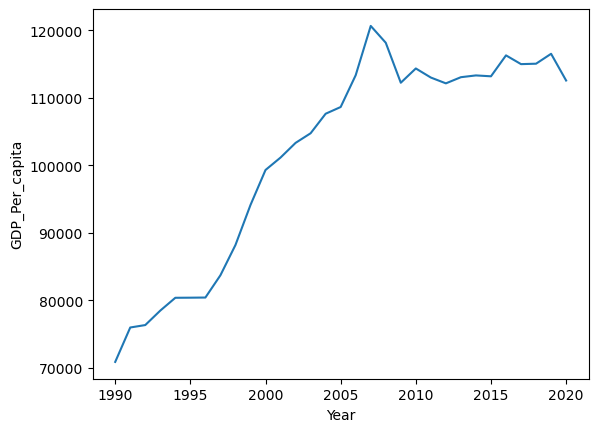

In [35]:
sns.lineplot(x=luxembourg.Year, y=luxembourg.GDP_Per_capita)

Above code generates a lineplot for Luxembourgs GDP_Per_capita by Year.

#### 12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

Luxembourg had the highest GDP_Per_capita for the year 2020. I chose to plot this on a lineplot as it's generally accepted as the best method to visualize simple changes over time.

In [36]:
mingdp2020 = gdp2020_df.GDP_Per_capita.min()
mingdp2020country = gdp2020_df[(gdp2020_df.GDP_Per_capita == mingdp2020)]
mingdp2020country

,Country,Year,GDP_Per_capita
914,Burundi,2020,731.064074


In [37]:
burundi = gdp_df[(gdp_df.Country == 'Burundi')]

Repeating the steps above for the minimum GDP_Per_capita country in 2020, creating a dataframe of all years associated with Burundi.

<AxesSubplot:xlabel='Year', ylabel='GDP_Per_capita'>

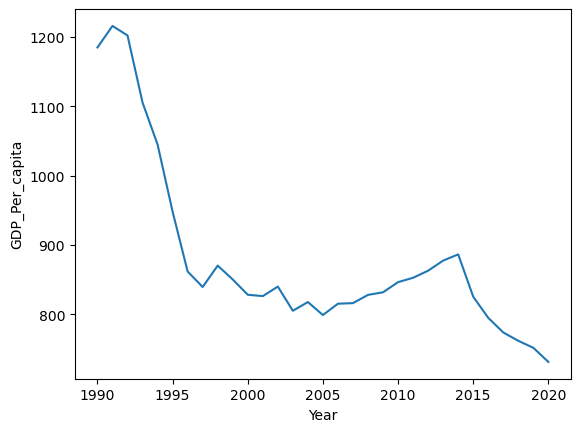

In [38]:
sns.lineplot(x=burundi.Year, y=burundi.GDP_Per_capita)

Again, chose the lineplot to show how Burundi's GDP_Per_capita has changed over time. 

#### 13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

Burundi had the lowest GDP_Per_capita for 2020.

#### **Bonus question:** Is it true in general that countries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [39]:
gdpcompare = gdp_df[(gdp_df.Year == 1990) | (gdp_df.Year == 2020)]
gdp1990_df = gdp_df[(gdp_df.Year == 1990)]

Creating a DataFrame for 1990 and 2020 combined to start comparisons between the two years.

Created an additional DataFrame for just the year 1990.

<AxesSubplot:xlabel='Year', ylabel='GDP_Per_capita'>

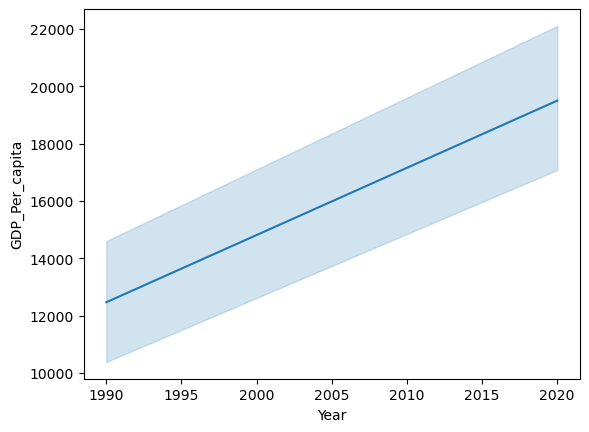

In [40]:
sns.lineplot(x=gdpcompare.Year, y=gdpcompare.GDP_Per_capita)

GDP_Per_capita does trend upwards from 1990 to 2020. Can't find the best method to graph it, although a linechart does show the upward trend.

# Revisit the second portion of question 13 to find which countries had lower GDP_Per_capita in 2020.

In [41]:
internet_df = pd.read_csv("..\data\internet_use.csv", nrows=4495)

reading in internet_use.csv, initially pulled an error. Investigated the file, found the dictionary of footnotes at the bottom, only imported rows existing before the footnotes. 

In [42]:
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN


In [43]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  4495 non-null   object 
 1   Year             4495 non-null   int64  
 2   Value            4495 non-null   float64
 3   Value Footnotes  948 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 140.6+ KB


Above codes are checking datatypes and format of the DataFrame

In [44]:
internet_df = internet_df.drop(columns = 'Value Footnotes')

In [45]:
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']

Above code drops footnotes column and renames the remaining columns. 

In [46]:
internet_df.Year.value_counts()

1990    210
2011    207
2007    206
2008    204
2012    203
2010    203
2009    203
2014    202
2013    202
2002    202
2005    201
2001    201
2006    200
2000    199
2004    199
1999    198
2003    196
1998    190
1997    184
1996    175
1995    138
1994     91
1993     65
1992     50
1991     39
1989      8
1980      7
1965      7
1970      7
1975      7
1976      7
1977      7
1978      7
1979      7
1982      7
1981      7
1983      7
1984      7
1985      7
1986      7
1987      7
1988      7
1960      7
Name: Year, dtype: int64

above code lists the number of observations per year of the DataFrame.

#### 16. Look at the number of observations in this dataset per year. What do you notice?

Internet use has been reported for more UN members each year since the beginning of the dataset with the exception of a few years where the number reported stayed the same. 

In [47]:
nonzerointernet = internet_df[(internet_df.Internet_Users_Pct > 0)]
firstnonzerointernet = nonzerointernet.sort_values(by=['Year', 'Internet_Users_Pct'])
firstnonzerointernet.head(20)

,Country,Year,Internet_Users_Pct
375,Belgium,1990,0.001007
3720,Spain,1990,0.012874
2048,Italy,1990,0.017545
2095,Japan,1990,0.020294
2217,Korea (Rep. of),1990,0.023265
1413,France,1990,0.052778
4276,United Kingdom,1990,0.087355
1107,Denmark,1990,0.097277
2023,Israel,1990,0.110774
1535,Germany,1990,0.125892


#### 17. What is the first year to have a non-zero internet users percentage value?

Above code finds all instances of Internet_Users_Pct greater than 0, then sorts by 'Year' and 'Internet_Users_Pct'. There are 19 countries reporting a greater than 0 'Internet_Users_Pct' in 1990. 

In [48]:
internet2014 = internet_df[(internet_df.Year == 2014)]
internet2000 = internet_df[(internet_df.Year == 2000)]

Creating frames of internet for the years 2000 and 2014. 

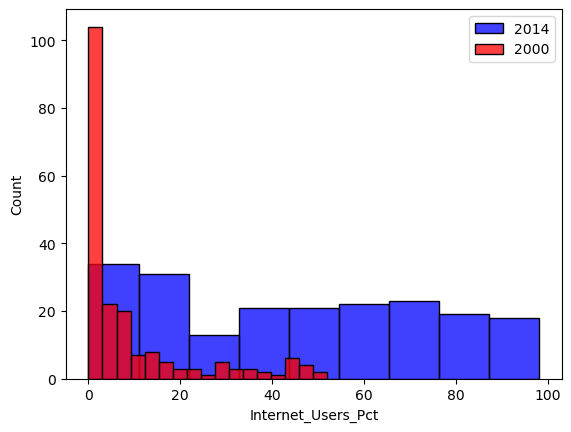

In [49]:
sns.histplot(data=internet2014, x="Internet_Users_Pct", color="blue", label="2014")
sns.histplot(data=internet2000, x="Internet_Users_Pct", color="red", label="2000")
plt.legend()

#### 18. How does the distribution of internet users percent differ for 2000 and 2014?

Above code plots a histogram of years 2000 and 2014. In the year 2000, the majority of reports still fell under 20%. In 2014, the majority of reports are now over 20%.

In [50]:
under5pct2014 = internet2014[(internet2014.Internet_Users_Pct < 5)]
under5pct2014.shape

(16, 3)

Above code is subsetting the internet2014 dataframe to only those with <5% Internet_Users_Pct and reporting the shape of the new set where 16 rows represent 16 different countries. 

#### 19. For how many countries was the percentage of internet users below 5% in 2014?

There were 16 countries in the year 2014 with a Internet_Users_Pct below 5%.

In [51]:
%who

burundi	 first100k	 firstnonzerointernet	 gdp100k	 gdp1990_df	 gdp2020_df	 gdp_decades	 gdp_df	 gdpcompare	 
internet2000	 internet2014	 internet_df	 luxembourg	 mask_2020	 maxgdp2020	 maxgdp2020country	 mingdp2020	 mingdp2020country	 
missing_year_mask	 missing_years	 nonzerointernet	 np	 pd	 plt	 sns	 under5pct2014	 year_counts	 
years	 


In [52]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, on=['Country', 'Year'], how='outer')

In [53]:
gdp_and_internet_use.head(25)

,Country,Year,GDP_Per_capita,Internet_Users_Pct
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
5,Afghanistan,2015,2068.265904,NaN
6,Afghanistan,2014,2102.384604,6.390000
7,Afghanistan,2013,2116.465258,5.900000
8,Afghanistan,2012,2075.491614,5.454545
9,Afghanistan,2011,1904.559926,5.000000


In [54]:
internet_df.head(25)

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
5,Afghanistan,2009,3.550000
6,Afghanistan,2008,1.840000
7,Afghanistan,2007,1.900000
8,Afghanistan,2006,2.107124
9,Afghanistan,2005,1.224148


In [57]:
gdp_df.head(25)

,Country,Year,GDP_Per_capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
5,Afghanistan,2015,2068.265904
6,Afghanistan,2014,2102.384604
7,Afghanistan,2013,2116.465258
8,Afghanistan,2012,2075.491614
9,Afghanistan,2011,1904.559926


In [55]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   int32  
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), int32(1), object(1)
memory usage: 87.9+ KB


In [56]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7176 non-null   object 
 1   Year            7176 non-null   int32  
 2   GDP_Per_capita  7176 non-null   float64
dtypes: float64(1), int32(1), object(1)
memory usage: 140.3+ KB
